# ICS 485 - Machine Learning
Term 201
Sec:01

## Utilizing Machine Learning Algorithms to Produce Face Mask Detection Models
### Term Project



For: Andri Mirzal

Team: IDDQD-lite
* Ahmad Alsaqqa - 201541790
* Mohammad Alghamdi - 201670960

## Datasets:
   * Dataset01: https://www.kaggle.com/sumansid/facemask-dataset
   * Dataset02: https://www.kaggle.com/omkargurav/face-mask-dataset
   * Dataset03: https://www.kaggle.com/ashishjangra27/face-mask-12k-images-dataset
   * Dataset04: https://www.kaggle.com/dhruvmak/face-mask-detection
   * Dataset05: https://www.kaggle.com/prithwirajmitra/covid-face-mask-detection-dataset


Kindly, refer to the project report for the references

# Import Libraries

In [88]:
import os
import numpy as np
import cv2
import random
import pandas as pd
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import pickle
import time

from skimage.feature import hog
from progressbar import ProgressBar
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from collections import Counter

root_path = "./Datasets"

# Datasets preprocessing

Our datasets' preprocessing was applied during the early stages of development. We are applying our data preprocessing to each dataset. The results, the, are converted to CSV files, a file per dataset. The convertion was made to increase the dataset sizes and to facilitate the handling of the files.

Dataset directory must be as follows:

* /Dataset
    * /Dataset01
        * /with_mask
            * [images go here]
        * /without_mask
            * [images go here]
    * /Dataset02
        * /with_mask
            * [images go here]
        * /without_mask
            * [images go here]
    * ...


The resulting CSV files are saved in the */Dataset* directory

**Important Note**: If the dataset CSV files already exist, you can safely skip until test_results function.

## func: Parse Data

* parameters:
    * String path to the directory of a dataset
* outputs:
    * list of each image file path
    * list of each image label
    * number of classes, in our case it's always 2
    * dictionary with labels as string keys and their corresponding labels as binary integer values.

In [2]:
def parse_data(datadir):
    img_list = []
    ID_list = []
    for root, directories, filenames in os.walk(datadir):  #root: median/1
        for filename in filenames:
            if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
                filei = os.path.join(root, filename)
                img_list.append(filei)
                ID_list.append(root.split('/')[-1])


    # construct a dictionary, where key and value correspond to ID and target
    uniqueID_list = list(set(ID_list))
    class_n = len(uniqueID_list)
    target_dict = dict(zip(uniqueID_list, range(class_n)))
    print(target_dict)
    
    label_list = [target_dict[ID_key] for ID_key in ID_list]

    img_list, label_list = shuffle(img_list, label_list)
    
    
    print(f"#Images = {len(img_list)}, #Labels = {len(set(label_list))}")
    return img_list, label_list, class_n, target_dict

## func: Upload Images
* parameters:
    * list of each image file path
    * list of each image label
    * new image size resolution. defualt = 256x256
* output:
    * list of original images
    * list of hog featured images
    * dataset which contains list of hog featured images and their corresponding labels

In [3]:
#Upload the images as grayscale and flatten it
#The images are of different sizes so resize all the images to be 256*256
def upload_images(image_paths, label_list, new_size=256):
    dataset = []
    hog_images = []
    original_images = []

    pbar = ProgressBar()
    #for path in pbar(image_paths):
    for i in pbar(range(len(image_paths))):
        #The 0 indicate that cv2.imread read the image in grayscale
        img = cv2.imread(image_paths[i], cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (new_size, new_size))
        
        #img = img.flatten()
        original_images.append(img)
        
        # POSSIBLE SOURCE OF LOW ACCURACY
        hog_features, img = hog(img,
                                orientations=8,
                                pixels_per_cell=(5, 5),
                                cells_per_block=(1, 1),
                                visualize=True,
                                block_norm='L2')
        
        hog_features = np.append(hog_features, label_list[i])

        
        hog_images.append(img)
        dataset.append(hog_features)
    
    dataset = np.array(dataset)

    print(f"Flatten Image New Size = {new_size} * {new_size} = {new_size**2}\n")
    print(f"Dataset Shape = {dataset.shape}")
    
    return original_images, hog_images, dataset

## func: Plot Faces
* parameters:
    * image in array-like pixels
    * image size

In [4]:
def plot_faces(pixels, image_size):
    fig, axes = plt.subplots(1, 5, figsize=(15, 15))
    for i, ax in enumerate(axes.flat):
        ax.imshow(np.array(pixels)[i].reshape(image_size, image_size), cmap='gray')
    plt.show()

## func: Convert to CSV
    This is the driver function to the functions above. The *root_path* must be set to initiate the conversion

N/A% (0 of 337) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

{'without_mask': 0, 'with_mask': 1}
#Images = 337, #Labels = 2


100% (337 of 337) |######################| Elapsed Time: 0:01:10 Time:  0:01:10


Flatten Image New Size = 150 * 150 = 22500

Dataset Shape = (337, 7201)
Dataset01 has been converted to csv successfully!


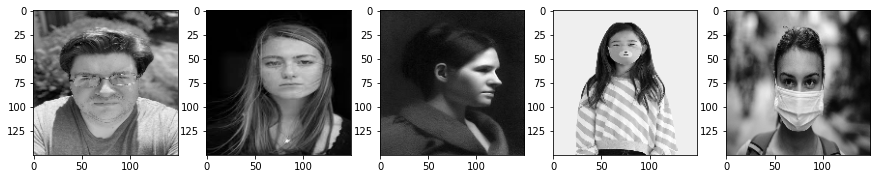

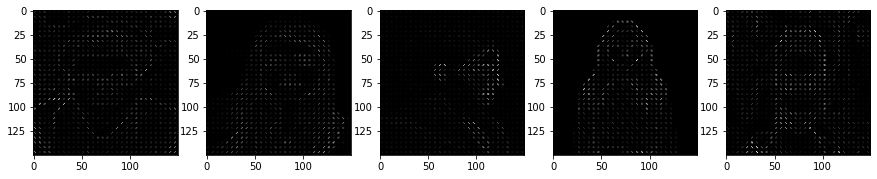

N/A% (0 of 7553) |                       | Elapsed Time: 0:00:00 ETA:  --:--:--

Labels: [0, 0, 0, 1, 1, 1]
{'without_mask': 0, 'with_mask': 1}
#Images = 7553, #Labels = 2


100% (7553 of 7553) |####################| Elapsed Time: 0:21:00 Time:  0:21:00


Flatten Image New Size = 150 * 150 = 22500

Dataset Shape = (7553, 7201)
Dataset02 has been converted to csv successfully!


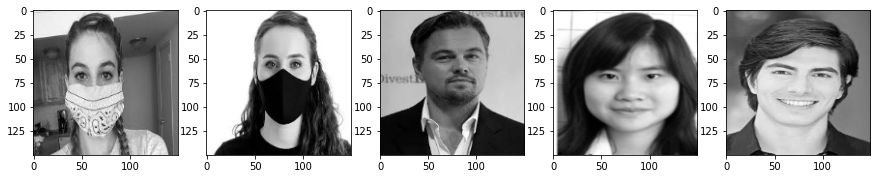

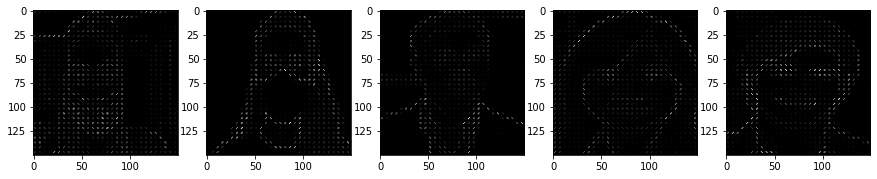

N/A% (0 of 11792) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--

Labels: [1, 1, 0, 0, 0, 1]
{'without_mask': 0, 'with_mask': 1}
#Images = 11792, #Labels = 2


100% (11792 of 11792) |##################| Elapsed Time: 0:33:11 Time:  0:33:11


Flatten Image New Size = 150 * 150 = 22500

Dataset Shape = (11792, 7201)
Dataset03 has been converted to csv successfully!


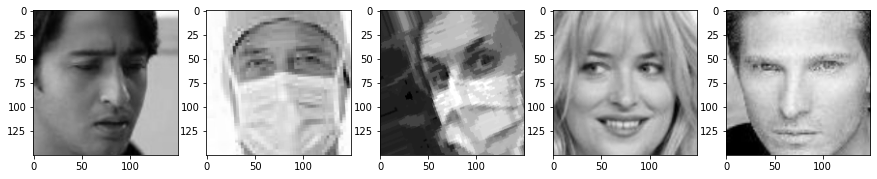

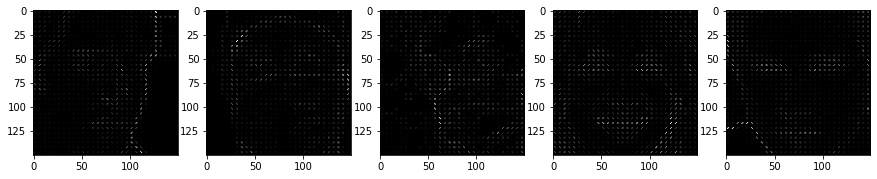

N/A% (0 of 440) |                        | Elapsed Time: 0:00:00 ETA:  --:--:--

Labels: [0, 1, 1, 0, 0, 0]
{'without_mask': 0, 'with_mask': 1}
#Images = 440, #Labels = 2


100% (440 of 440) |######################| Elapsed Time: 0:01:28 Time:  0:01:28


Flatten Image New Size = 150 * 150 = 22500

Dataset Shape = (440, 7201)
Dataset04 has been converted to csv successfully!


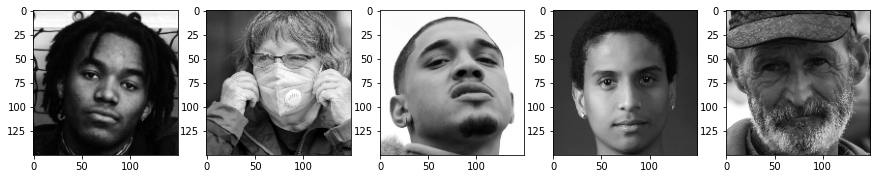

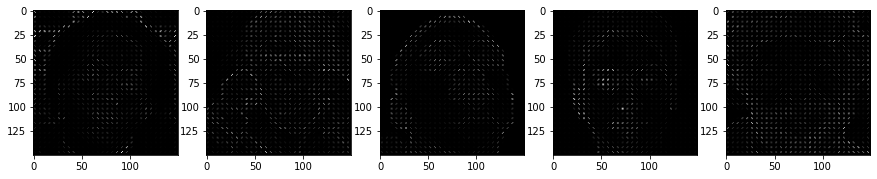

  0% (1 of 1006) |                       | Elapsed Time: 0:00:00 ETA:   0:02:25

Labels: [0, 1, 0, 0, 0, 0]
{'without_mask': 0, 'with_mask': 1}
#Images = 1006, #Labels = 2


100% (1006 of 1006) |####################| Elapsed Time: 0:03:34 Time:  0:03:34


Flatten Image New Size = 150 * 150 = 22500

Dataset Shape = (1006, 7201)
Dataset05 has been converted to csv successfully!


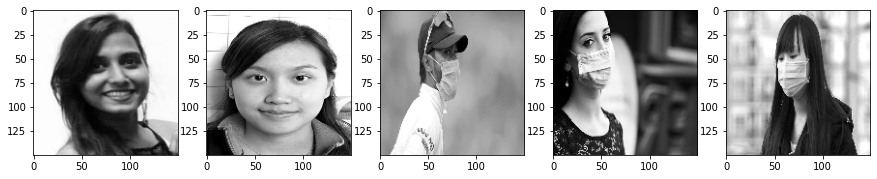

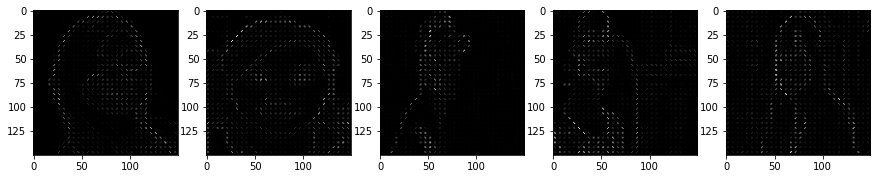

Labels: [0, 0, 1, 1, 1, 0]


In [8]:
def convert_to_csv(new_size=256, dataset_number='01'):
    #Load the train, validation, and test dataset images paths and labels.
    root_path = root_path + "/Dataset"+ dataset_number +"/"

    img_list, label_list, classes, target_dict = parse_data(root_path)

    original_images, hog_images, dataset = upload_images(img_list, label_list, new_size=new_size)
    
    #Save the CSV file.
    df = pd.DataFrame(dataset)
    df.to_csv(root_path + '/Dataset' + dataset_number + '.csv', index=False, header=False)
    print(f'Dataset{dataset_number} has been converted to csv successfully!')
    
    #Plot the images.
    plot_faces(original_images[0:6], new_size)
    plot_faces(hog_images[0:6], new_size)
    print(f"Labels: {label_list[0:6]}")

    
image_size = 150
for i in range(1,6):
    convert_to_csv(image_size, f'0{i}')
    print(10*'=')

## Driver for Converting the datasets into CSV files

In [52]:
'''
    This method might not be space efficient
    but it is time efficient. 
'''
#Append all the datasets in one list.
datasets = []

for i in range(1,6):
    data = np.genfromtxt(f"{root_path}/Dataset0{i}.csv", dtype=float, delimiter=',')
    datasets.append(np.array(data))
    print(f"Dataset0{i} Loaded")
    
datasets = np.array(datasets)

Dataset01 Loaded
Dataset02 Loaded
Dataset03 Loaded
Dataset04 Loaded
Dataset05 Loaded


## func: Test results
* parameters:
    * Actual labels
    * Predicted labels
    * Epsilon, which is a small value that prevents the division by zero in all the sensitivity, precision, and recall.
    
Since our problem is a binary classification problem, we used confusion matrix to test and evalute our result. The following performance measures are, then, calculated:
   * Accuracy
   * F1 Score
   * Sensitivity
   * Percision
   * Recall

In [3]:
def test_results(labels, predict_labels, eps=0.00001):
    TP = np.logical_and(labels == predict_labels, labels == 1).sum()
    TN = np.logical_and(labels == predict_labels, labels == 0).sum()
    
    FP = np.logical_and(labels != predict_labels, predict_labels == 1).sum()
    FN = np.logical_and(labels != predict_labels, predict_labels == 0).sum()
    
    #Number of labels
    n = labels.shape[0]
    
    Accuracy = ((TN + TP)/n)
    Sensitivity = (TP/(TP + FN + eps))
    Precision = (TP / (TP + FP + eps))
    Recall = (TP / (TP + FN + eps))
    F1_score = (2 * ((Precision * Recall) / (Precision + Recall))) 
    
    print(10*"*", "Confusion Matrix", 10*"*")
    
    print("True Positive  = ", TP)
    print("True Negative  = ", TN)
    print("False Positive = ", FP)
    print("False Negative = ", FN)
    
    print("\n", 10*"*", "Performance Measures", 10*"*")

    print("Accuracy    = ", round(Accuracy, 2))
    print("F1 Score    = ", round(F1_score, 2))
    print("Sensitivity = ", round(Sensitivity, 2))
    print("Precision   = ", round(Precision, 2))
    print("Recall      = ", round(Recall, 2))
    
    print("\n", 20*"*")

## func: Accuracy Score
* parameters:
    * Actual labels
    * Predicted labels
    
This is a derived function from test_results just to calculate the accuracy. It is used for the training routine only.

In [4]:
def accuracy_score(labels, predict_labels,):
    TP = np.logical_and(labels == predict_labels, labels == 1).sum()
    TN = np.logical_and(labels == predict_labels, labels == 0).sum()
    
    #Number of labels
    n = labels.shape[0]
    
    accuracy = ((TN + TP)/n)
    
    return round(accuracy, 2)

## func: K Folds
* Parameters:
    * dataset
    * folds
* output:
    * split dataset

In [5]:
# Split a dataset into k folds
def KFold(dataset, folds=5):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / folds)
    
    for i in range(folds):
        fold = list()
        while len(fold) < fold_size:
            index = random.randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
            
        dataset_split.append(np.array(fold))
        
    return np.array(dataset_split)

## func: Cross Validation
* parameter:
    * model object
    * kfold dataset

In [6]:
def cross_validation(model, kfold):   
    
    average_accuracy = 0.0
    folds = len(kfold)
    
    for index, fold in enumerate(kfold):
        start_time = time.time()
        
        #Copy the folded datasets into new variable
        kfold_copy = list(kfold)
        
        #Pop the validation fold and initilize the features, and labels
        val_fold = kfold_copy.pop(index)
        X_val, y_val = val_fold[:, 0:-1], val_fold[:, -1] 
        
        #Concatenate the reminaing folds into one array 
        #and initilize the features, and labels.
        train_fold = np.concatenate(kfold_copy, axis=0)
        X_train, y_trian = train_fold[:, 0:-1], train_fold[:, -1]
        
        #Train the model
        model.fit(X_train, y_trian)
        
        #Validate the model
        predictions = model.predict(X_val)
        
        #Get the model accuracy
        accuracy = accuracy_score(y_val, predictions)
        average_accuracy += accuracy
        
        end_time = time.time()
        print(f"Fold-{index} Accuracy = {round(accuracy, 2)}, time = {round((end_time - start_time)/60,2)} mins")
        
    print(f"{model.name} Average Accuracy for {folds}-folds = {round(average_accuracy/folds, 2)}")

# Machine Learning Algorithms

## 1. Support Vector Machines 

In [7]:
class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.name = "Support Vector Machine"
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        y_ = np.where(y <= 0, -1, 1)
        
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.where(approx <= 0, 0, 1)

### 5-Fold Cross Validation with Support Vector Machine

In [8]:
clf = SVM()

for index, dataset in enumerate(datasets):
    folds = KFold(dataset, folds=5)
    print(f"Dataset0{index+1}")
    cross_validation(clf, folds)
    print(20*"*")

Dataset01
Fold-0 Accuracy = 0.84, time = 0.08 mins
Fold-1 Accuracy = 0.88, time = 0.08 mins
Fold-2 Accuracy = 0.85, time = 0.08 mins
Fold-3 Accuracy = 0.84, time = 0.08 mins
Fold-4 Accuracy = 0.81, time = 0.08 mins
Support Vector Machine Average Accuracy for 5-folds = 0.84
********************
Dataset02
Fold-0 Accuracy = 0.8, time = 2.05 mins
Fold-1 Accuracy = 0.77, time = 2.06 mins
Fold-2 Accuracy = 0.8, time = 2.03 mins
Fold-3 Accuracy = 0.77, time = 2.07 mins
Fold-4 Accuracy = 0.8, time = 2.13 mins
Support Vector Machine Average Accuracy for 5-folds = 0.79
********************
Dataset03
Fold-0 Accuracy = 0.99, time = 2.89 mins
Fold-1 Accuracy = 0.98, time = 2.86 mins
Fold-2 Accuracy = 0.99, time = 2.9 mins
Fold-3 Accuracy = 0.98, time = 2.88 mins
Fold-4 Accuracy = 0.98, time = 2.86 mins
Support Vector Machine Average Accuracy for 5-folds = 0.98
********************
Dataset04
Fold-0 Accuracy = 0.83, time = 0.1 mins
Fold-1 Accuracy = 0.84, time = 0.1 mins
Fold-2 Accuracy = 0.86, time 

## 2. Naive Bayes

In [9]:
class NaiveBayes:

    def fit(self, X, y):
        self.name = "Naive Bayes"
        n_samples, n_features = X.shape
        self._classes = np.unique(y)
        n_classes = len(self._classes)

        # calculate mean, var, and prior for each class
        self._mean = np.zeros((n_classes, n_features), dtype=np.float64)
        self._var = np.zeros((n_classes, n_features), dtype=np.float64)
        self._priors =  np.zeros(n_classes, dtype=np.float64)

        for idx, c in enumerate(self._classes):
            X_c = X[y==c]
            self._mean[idx, :] = X_c.mean(axis=0)
            self._var[idx, :] = X_c.var(axis=0)
            self._priors[idx] = X_c.shape[0] / float(n_samples)

    def predict(self, X):
        pred = []
        
        for x in X:
            posteriors = []
            # calculate posterior probability for each class
            for idx, c in enumerate(self._classes):
                prior = np.log(self._priors[idx])
                
                # Calculate the probability density function
                mean = self._mean[idx]
                var = self._var[idx]
                numerator = np.exp(- (x-mean)**2 / (2 * var))
                denominator = np.sqrt(2 * np.pi * var)
                pdf =  numerator / denominator
                
                posterior = np.sum(np.log(pdf))
                posterior = prior + posterior
                posteriors.append(posterior)

            pred.append(self._classes[np.argmax(posteriors)])
        
        return np.array(pred)

### 5-Fold Cross Validation with Naive Bayes

In [10]:
clf = NaiveBayes()

for index, dataset in enumerate(datasets):
    folds = KFold(dataset, folds=5)
    print(f"Dataset0{index+1}")
    cross_validation(clf, folds)
    print(20*"*")

Dataset01
Fold-0 Accuracy = 0.78, time = 0.0 mins
Fold-1 Accuracy = 0.78, time = 0.0 mins
Fold-2 Accuracy = 0.78, time = 0.0 mins
Fold-3 Accuracy = 0.79, time = 0.0 mins
Fold-4 Accuracy = 0.72, time = 0.0 mins
Naive Bayes Average Accuracy for 5-folds = 0.77
********************
Dataset02
Fold-0 Accuracy = 0.76, time = 0.01 mins
Fold-1 Accuracy = 0.74, time = 0.01 mins
Fold-2 Accuracy = 0.74, time = 0.01 mins
Fold-3 Accuracy = 0.75, time = 0.01 mins
Fold-4 Accuracy = 0.73, time = 0.01 mins
Naive Bayes Average Accuracy for 5-folds = 0.74
********************
Dataset03
Fold-0 Accuracy = 0.94, time = 0.02 mins
Fold-1 Accuracy = 0.95, time = 0.02 mins
Fold-2 Accuracy = 0.94, time = 0.02 mins
Fold-3 Accuracy = 0.94, time = 0.02 mins
Fold-4 Accuracy = 0.94, time = 0.02 mins
Naive Bayes Average Accuracy for 5-folds = 0.94
********************
Dataset04
Fold-0 Accuracy = 0.86, time = 0.0 mins
Fold-1 Accuracy = 0.85, time = 0.0 mins
Fold-2 Accuracy = 0.84, time = 0.0 mins
Fold-3 Accuracy = 0.88,

## 3. Logistic Regression

In [11]:
class LogisticRegression:

    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.name = "Logistic Regression"
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        self.weights = np.zeros(n_features)
        self.bias = 0

        # gradient descent
        for _ in range(self.n_iters):
            z = np.dot(X, self.weights) + self.bias
            y_predicted = self._sigmoid(z)

            # compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))
            db = (1 / n_samples) * np.sum(y_predicted - y)
            
            # update rule
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_predicted = self._sigmoid(z)
        y_predicted_cls = [1 if i > 0.5 else 0 for i in y_predicted]
        return np.array(y_predicted_cls)

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

### 5-Fold Cross Validation with Logistic Regression

In [12]:
clf = LogisticRegression()

for index, dataset in enumerate(datasets):
    folds = KFold(dataset, folds=5)
    print(f"Dataset0{index+1}")
    cross_validation(clf, folds)
    print(20*"*")

Dataset01
Fold-0 Accuracy = 0.58, time = 0.24 mins
Fold-1 Accuracy = 0.85, time = 0.26 mins
Fold-2 Accuracy = 0.78, time = 0.24 mins
Fold-3 Accuracy = 0.85, time = 0.26 mins
Fold-4 Accuracy = 0.87, time = 0.24 mins
Logistic Regression Average Accuracy for 5-folds = 0.79
********************
Dataset02
Fold-0 Accuracy = 0.79, time = 10.21 mins
Fold-1 Accuracy = 0.76, time = 8.45 mins
Fold-2 Accuracy = 0.75, time = 9.97 mins
Fold-3 Accuracy = 0.78, time = 8.55 mins
Fold-4 Accuracy = 0.78, time = 10.3 mins
Logistic Regression Average Accuracy for 5-folds = 0.77
********************
Dataset03
Fold-0 Accuracy = 0.96, time = 20.61 mins
Fold-1 Accuracy = 0.96, time = 13.62 mins
Fold-2 Accuracy = 0.96, time = 13.61 mins
Fold-3 Accuracy = 0.95, time = 15.26 mins
Fold-4 Accuracy = 0.95, time = 13.01 mins
Logistic Regression Average Accuracy for 5-folds = 0.96
********************
Dataset04
Fold-0 Accuracy = 0.88, time = 0.26 mins
Fold-1 Accuracy = 0.86, time = 0.26 mins
Fold-2 Accuracy = 0.89, ti

## 4. K-Nearist Neighbor

In [13]:
class KNN:

    def __init__(self, k=3):
        self.name = "KNN"
        #Number of neighbor to consider
        self.k = k
    
    def fit(self, X, y):
        '''
            load the train features and labels, so the predict
            method can calculate the euclidean distance between the new
            instance and the train instance.
        '''
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        pred = []
                
        for x in X:
            # Compute the distances between the new instance x and all the trianing instances
            distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
            
            # Sort the distances to find the nearest k neighbors
            k_idx = np.argsort(distances)[:self.k]
            
            # Find the labels for the k neighbors
            k_neighbor_labels = [self.y_train[i] for i in k_idx]  
            
            # Find the predicted label 
            predicted_label = Counter(k_neighbor_labels).most_common(1)
            
            pred.append(predicted_label[0][0])
        
        return np.array(pred)
    
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

### 5-Fold Cross Validation with KNN

In [14]:
clf = KNN(k=3)

for index, dataset in enumerate(datasets):
    folds = KFold(dataset, folds=5)
    print(f"Dataset0{index+1}")
    cross_validation(clf, folds)
    print(20*"*")

Dataset01
Fold-0 Accuracy = 0.69, time = 0.01 mins
Fold-1 Accuracy = 0.73, time = 0.01 mins
Fold-2 Accuracy = 0.63, time = 0.01 mins
Fold-3 Accuracy = 0.67, time = 0.01 mins
Fold-4 Accuracy = 0.69, time = 0.01 mins
KNN Average Accuracy for 5-folds = 0.68
********************
Dataset02
Fold-0 Accuracy = 0.72, time = 2.6 mins
Fold-1 Accuracy = 0.73, time = 2.58 mins
Fold-2 Accuracy = 0.74, time = 2.6 mins
Fold-3 Accuracy = 0.74, time = 2.57 mins
Fold-4 Accuracy = 0.73, time = 2.59 mins
KNN Average Accuracy for 5-folds = 0.73
********************
Dataset03
Fold-0 Accuracy = 0.95, time = 6.38 mins
Fold-1 Accuracy = 0.96, time = 6.46 mins
Fold-2 Accuracy = 0.95, time = 6.44 mins
Fold-3 Accuracy = 0.95, time = 6.36 mins
Fold-4 Accuracy = 0.95, time = 6.36 mins
KNN Average Accuracy for 5-folds = 0.95
********************
Dataset04
Fold-0 Accuracy = 0.77, time = 0.01 mins
Fold-1 Accuracy = 0.83, time = 0.01 mins
Fold-2 Accuracy = 0.77, time = 0.01 mins
Fold-3 Accuracy = 0.82, time = 0.01 mins


## 5. Perceptron

In [15]:
class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.name = "Perceptron"
        self.lr = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = np.where(linear_output>=0, 1, 0)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = np.where(linear_output>=0, 1, 0)
        return y_predicted

### 5-Fold Cross Validation with Perceptron

In [16]:
clf = Perceptron()

for index, dataset in enumerate(datasets):
    folds = KFold(dataset, folds=5)
    print(f"Dataset0{index+1}")
    cross_validation(clf, folds)
    print(20*"*")

Dataset01
Fold-0 Accuracy = 0.82, time = 0.08 mins
Fold-1 Accuracy = 0.82, time = 0.08 mins
Fold-2 Accuracy = 0.82, time = 0.08 mins
Fold-3 Accuracy = 0.82, time = 0.08 mins
Fold-4 Accuracy = 0.72, time = 0.08 mins
Perceptron Average Accuracy for 5-folds = 0.8
********************
Dataset02
Fold-0 Accuracy = 0.77, time = 1.8 mins
Fold-1 Accuracy = 0.8, time = 1.82 mins
Fold-2 Accuracy = 0.77, time = 1.84 mins
Fold-3 Accuracy = 0.78, time = 1.82 mins
Fold-4 Accuracy = 0.8, time = 1.81 mins
Perceptron Average Accuracy for 5-folds = 0.78
********************
Dataset03
Fold-0 Accuracy = 0.98, time = 2.79 mins
Fold-1 Accuracy = 0.98, time = 2.86 mins
Fold-2 Accuracy = 0.99, time = 2.81 mins
Fold-3 Accuracy = 0.98, time = 2.98 mins
Fold-4 Accuracy = 0.98, time = 2.93 mins
Perceptron Average Accuracy for 5-folds = 0.98
********************
Dataset04
Fold-0 Accuracy = 0.77, time = 0.12 mins
Fold-1 Accuracy = 0.85, time = 0.11 mins
Fold-2 Accuracy = 0.89, time = 0.11 mins
Fold-3 Accuracy = 0.81

# Best Models based on Datasets
Given the best accuracy algorithm per dataset, we have run our testing routine using these algorithms. We used the fusion matrix to calculate the performance measures for each dataset using its corresponding algorithm.

## Dataset01
Best Model for Dataset01 is Support Vector Machine

In [74]:
dataset = datasets[0]

X, y = dataset[:, 0:-1], dataset[:, -1] 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

#initilize, train, and predict the model for each dataset.
clf = SVM()
clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_val)

print(f"Support Vector Machine Results for Dataset01")
test_results(y_val, clf_prediction)

Support Vector Machine Results for Dataset01
********** Confusion Matrix **********
True Positive  =  21
True Negative  =  63
False Positive =  2
False Negative =  16

 ********** Performance Measures **********
Accuracy    =  0.82
F1 Score    =  0.7
Sensitivity =  0.57
Precision   =  0.91
Recall      =  0.57

 ********************


## Dataset02
Best Model for Dataset02 is Support Vector Machine

In [75]:
dataset = datasets[1]

X, y = dataset[:, 0:-1], dataset[:, -1] 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

#initilize, train, and predict the model for each dataset.
clf = SVM()
clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_val)

print(f"Support Vector Machine Results for Dataset02")
test_results(y_val, clf_prediction)

Support Vector Machine Results for Dataset02
********** Confusion Matrix **********
True Positive  =  929
True Negative  =  849
False Positive =  276
False Negative =  212

 ********** Performance Measures **********
Accuracy    =  0.78
F1 Score    =  0.79
Sensitivity =  0.81
Precision   =  0.77
Recall      =  0.81

 ********************


## Dataset03
Best Model for Dataset03 is Support Vector Machine

In [76]:
dataset = datasets[2]

X, y = dataset[:, 0:-1], dataset[:, -1] 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

#initilize, train, and predict the model for each dataset.
clf = SVM()
clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_val)

print(f"Support Vector Machine Results for Dataset03")
test_results(y_val, clf_prediction)

Support Vector Machine Results for Dataset03
********** Confusion Matrix **********
True Positive  =  1728
True Negative  =  1753
False Positive =  31
False Negative =  26

 ********** Performance Measures **********
Accuracy    =  0.98
F1 Score    =  0.98
Sensitivity =  0.99
Precision   =  0.98
Recall      =  0.99

 ********************


## Dataset04
Best Model for Dataset04 is Logistic Regression

In [77]:
dataset = datasets[3]

X, y = dataset[:, 0:-1], dataset[:, -1] 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

#initilize, train, and predict the model for each dataset.
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_val)

print(f"Logistic Regression Results for Dataset04")
test_results(y_val, clf_prediction)

Logistic Regression Results for Dataset04
********** Confusion Matrix **********
True Positive  =  60
True Negative  =  54
False Positive =  9
False Negative =  9

 ********** Performance Measures **********
Accuracy    =  0.86
F1 Score    =  0.87
Sensitivity =  0.87
Precision   =  0.87
Recall      =  0.87

 ********************


## Dataset05
Best Model for Dataset05 is Perceptron

In [78]:
dataset = datasets[2]

X, y = dataset[:, 0:-1], dataset[:, -1] 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

#initilize, train, and predict the model for each dataset.
clf = Perceptron()
clf.fit(X_train, y_train)
clf_prediction = clf.predict(X_val)

print(f"Perceptron Results for Dataset05")
test_results(y_val, clf_prediction)

Perceptron Results for Dataset05
********** Confusion Matrix **********
True Positive  =  131
True Negative  =  125
False Positive =  23
False Negative =  23

 ********** Performance Measures **********
Accuracy    =  0.85
F1 Score    =  0.85
Sensitivity =  0.85
Precision   =  0.85
Recall      =  0.85

 ********************


# Training the Best Model with the Best Dataset

Dataset03, when used with support vector machines, resulted in the highest overall performance.

In [86]:
best_dataset = datasets[2]

best_model = SVM()

X, y = best_dataset[:, 0:-1], best_dataset[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=8)

best_model.fit(X_train, y_train)

predictions = best_model.predict(X_val)

print("Best Model Results () for Dataset03")
test_results(y_val, predictions)

Best Model Results () for Dataset03
********** Confusion Matrix **********
True Positive  =  1728
True Negative  =  1753
False Positive =  31
False Negative =  26

 ********** Performance Measures **********
Accuracy    =  0.98
F1 Score    =  0.98
Sensitivity =  0.99
Precision   =  0.98
Recall      =  0.99

 ********************


# Saving the Best Model

In [90]:
pickle.dump(best_model, open("best_model.pt", "wb" ) )